# Garvit Rana
# Prediction using Supervised ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Dataset contains total of 25 records.

## Descriptive Statistics

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 ## Exploratory Data Analysis 

### Checking NaN and Duplicated Values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.duplicated().sum()

0

#### Dataset does not contain any NaN and Duplicated Values

### Scores

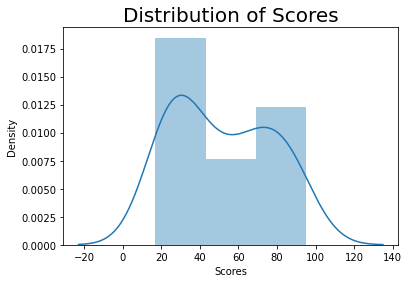

In [7]:
sns.distplot(df['Scores'])
plt.title('Distribution of Scores',size=20)
plt.show()

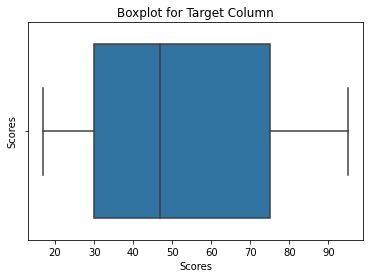

In [8]:
sns.boxplot(df['Scores'])
plt.title('Boxplot for Target Column')
plt.ylabel('Scores')
plt.show()

### Grade

#### Score >= 75 ------> A Grade
#### 75 > Scores >= 60 -----> B Grade
#### 60 > Scores >= 35 -----> C Grade

In [9]:
def getgrade(mark):
    if mark>=75:
        return "A"
    elif mark>=60 and mark<75:
        return "B"
    elif mark>=35 and mark<60:
        return "C"
    else:
        return "D"

In [10]:
df["Grade"]=df["Scores"].apply(getgrade)

In [11]:
df.head()

,Hours,Scores,Grade
0,2.5,21,D
1,5.1,47,C
2,3.2,27,D
3,8.5,75,A
4,3.5,30,D


<AxesSubplot:ylabel='Grade'>

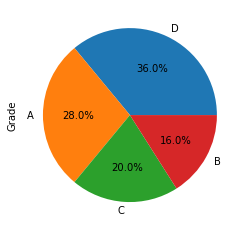

In [12]:
df["Grade"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<AxesSubplot:xlabel='Grade', ylabel='count'>

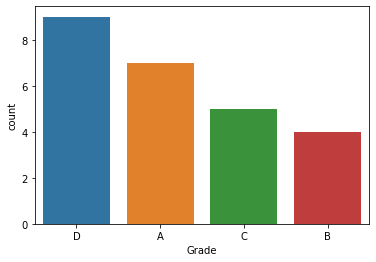

In [13]:
sns.countplot(x=df['Grade'],order=df['Grade'].value_counts().index)

### Hours Study

In [14]:
df['Hours'].describe()

count    25.000000
mean      5.012000
std       2.525094
min       1.100000
25%       2.700000
50%       4.800000
75%       7.400000
max       9.200000
Name: Hours, dtype: float64

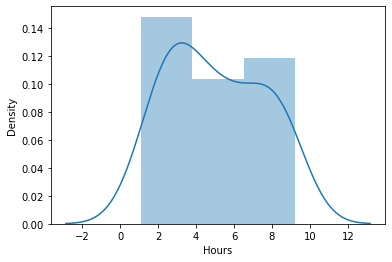

In [15]:
sns.distplot(df['Hours'])
plt.show()

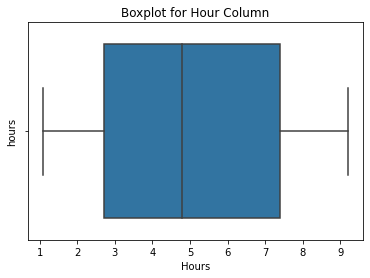

In [16]:
sns.boxplot(df['Hours'])
plt.title('Boxplot for Hour Column')
plt.ylabel('hours')
plt.show()

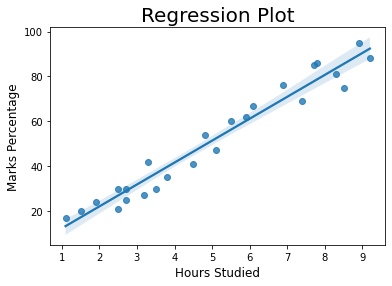

In [17]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

<AxesSubplot:>

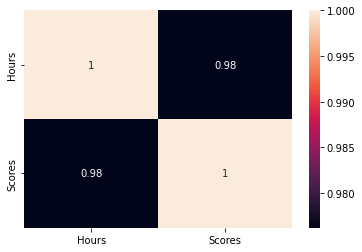

In [18]:
sns.heatmap(df.corr(),annot=True)

### Feature Selection

In [19]:
x=df.iloc[:,:-2]
y=df['Scores']

### Spliting Dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Building

## LinearRegression Model-- Baseline Model

In [21]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [22]:
ypred = linreg.predict(X_test)

### Slope Value

In [23]:
linreg.coef_

array([9.65029083])

### Intercept value

In [24]:
linreg.intercept_

3.4050301755918895

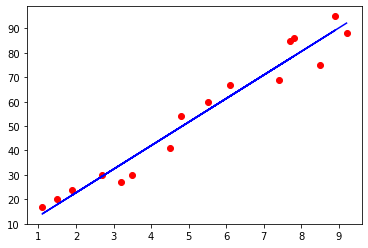

In [25]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,linreg.predict(X_train), color="blue")
plt.show()

### Regression Evaluation Metrics

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,ypred)
mse = mean_squared_error(y_test,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test,ypred)

print(f"MAE :- {mae}\nMSE:- {mse}\nRMSE:- {rmse}\nACCURACY:- {r2}")

MAE :- 4.564015037730867
MSE:- 24.074686364260987
RMSE:- 4.90659620962037
ACCURACY:- 0.9435488190277577


### Residue Plot

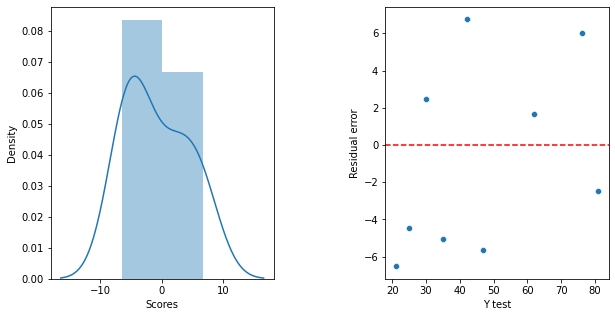

In [27]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=y_test,y= residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Y test')
axes[1].set_ylabel('Residual error')
fig.subplots_adjust(wspace=0.5)

### Checking Training and Testing Accuracy

In [28]:
train=linreg.score(X_train,y_train)
test=linreg.score(X_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Train:-0.9543348637719865
Test:-0.9435488190277577


## RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators = 100,
                              random_state = 1,
                              n_jobs = -1)
rfr.fit(X_train,y_train)
ypred=rfr.predict(X_test)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train=rfr.score(X_train,y_train)
test=rfr.score(X_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Mean Absolute Error:--4.868888888888888
Root Mean Square Error:--2.2065558884580487
R2 Score:--0.909342351783233

Train:-0.9893710396704576
Test:-0.909342351783233


### LinearRegression Model Performs Best With accuracy of 94%.

## Model Testing On New Observation

In [30]:
newob = 9.25
yp = linreg.predict([[newob]])[0]
print(f"If you Study of {newob} hrs/day, You will Get Score Around {yp}% ")

If you Study of 9.25 hrs/day, You will Get Score Around 92.67022037739972% 


### The answer is around 92.67%